In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing, cross_validation, neighbors, linear_model, feature_selection
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [123]:
df = pd.read_csv('machine.data.txt',
                header=0,
                names = ['vendor', 'model', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp', 'erp'])
df.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,prp,erp
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [124]:
df.drop(['vendor', 'model'], 1, inplace=True)

In [125]:
X = np.array(df.drop(['erp'], 1))
y = np.array(df['erp'])

In [126]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.19047619047619047


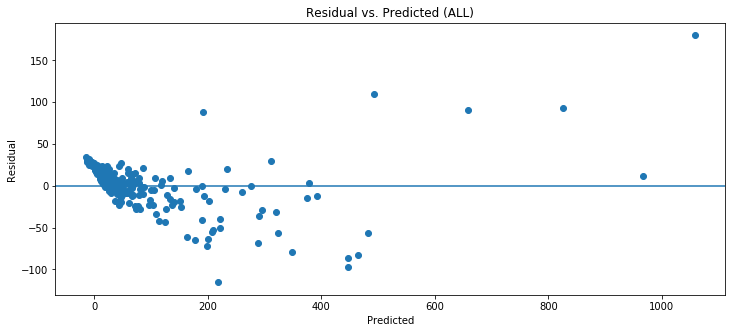

In [127]:
predicted = regr.predict(X).ravel()
actual = y
residual = actual - predicted

plt.figure(figsize=(12,5))
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted (ALL)')
plt.show()

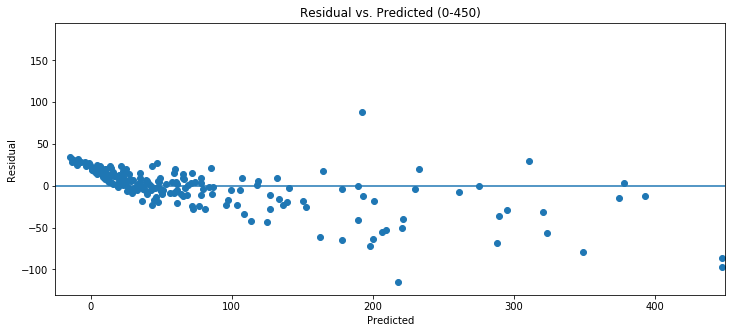

In [128]:
plt.figure(figsize=(12,5))
plt.scatter(predicted, residual)
plt.xlim(-25,450)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted (0-450)')
plt.show()

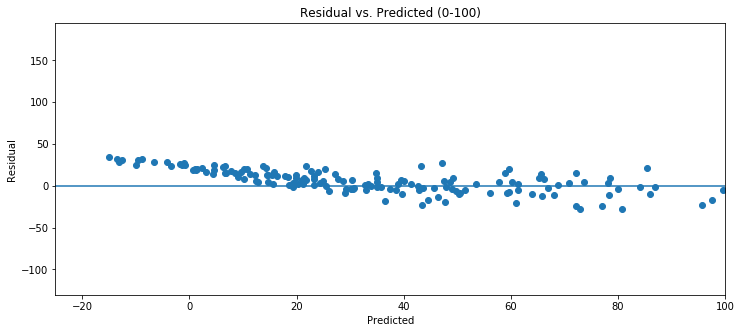

In [129]:
plt.figure(figsize=(12,5))
plt.scatter(predicted, residual)
plt.xlim(-25,100)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted (0-100)')
plt.show()

In [130]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))

Coefficients: 
 [0.03727842 0.00544989 0.00339975 0.09648472 0.01894116 0.31797536
 0.58190803]
Intercept: 
 -33.91636550563602

Coefficients: 
 [0.03727842 0.00544989 0.00339975 0.09648472 0.01894116 0.31797536
 0.58190803]

Intercept: 
 -33.91636550563602

R-squared:
0.9594589031690051


In [131]:
#95.95%. Now that's my kind of result! Still, let's go ahead and run the KNN
#First, in order to know how to set up my prediction line, let's describe our data
df.describe()

,myct,mmin,mmax,cach,chmin,chmax,prp,erp
count,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000
mean,204.202,2880.538,11824.019,24.096,4.644,17.740,105.178,98.851
std,260.833,3883.839,11747.917,37.418,6.787,24.913,161.090,154.975
min,17.000,64.000,64.000,0.000,0.000,0.000,6.000,15.000
25%,50.000,768.000,4000.000,0.000,1.000,5.000,27.000,28.000
50%,110.000,2000.000,8000.000,8.000,2.000,8.000,49.500,45.000
75%,225.000,4000.000,16000.000,32.000,6.000,24.000,111.500,99.500
max,1500.000,32000.000,64000.000,256.000,52.000,176.000,1150.000,1238.000


In [151]:
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [152]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.4f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.4f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.7367 (+/- 0.19)
Weighted Accuracy: 0.7975 (+/- 0.18)


In [153]:
knn = neighbors.KNeighborsRegressor(n_neighbors=20)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
knn_w.fit(X, y)

score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.4f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.4f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.6935 (+/- 0.25)
Weighted Accuracy: 0.7604 (+/- 0.24)


In [154]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X, y)

score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.4f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.4f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.7992 (+/- 0.15)
Weighted Accuracy: 0.8496 (+/- 0.13)


This dataset contains the Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.First, I ensured the data wass all useful and populated. Then I removed the columns that had no impact on the estimated relative performance. Then I created the data and target and ran a K Neightbors classifier model on it. I realized the error of using a classifier and turned to adding features. 

An Ordinary Least Squares model, measuring the Euclidian distance of each point to a calculated fit line showed an outstanding 95.95% R-squared score. And this is not an immediate red-flag for being too high for several reasonsdealing with CPU performance. There are a few outliers to skew the data. But they are few and their impact negligible. Non-learities are not a problem since we're dealing with how memory, cycle time, and number of channels affect overall performance. All features are relevant so we don't have a large number of features contributing to the R2. There is a no correlation of the features. The number of channels has no impact on the amount of memory really. It is simply a standard assumption that an increase in one is likely to be paired with an increase in the others as chip versions are designed with advancements batched in multiple areas. Heteroskedasticity is not a concern if we look at the plots closer up, into the buld of the points. 

The K Nearest Neighbors Regression is a simple model using the category of nearby datapoints and the relationship between pointss and datat for classification and regression. Choosing 10 for the number of neighbors to evaluate and comparing the data to the target in a five-fold cross-validation I get a CV score of 74% and 80% for unweighted and weighted scores, respectively. Increasing the number of neighbors to 20 shows a linear decrease in efficiency of about 4%. Further increases, which have been omitted from the final report confirm this decrease in KNN effectiveness, and reducing the neighbors to 5 yielded the highest result. This shows the KNN here is likely subjected to one of the model's common failings, sensitivity to localized data. 

So the OLS model is better fitted as a predictive model. However, to avoid selection bias it seems prudent to run several more models on this data. Though a high score is desired, choosing the model that provides it does not necessarily mean that the model that generated it beswt represents the regression. 